In [1]:
%matplotlib inline 
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from xfoil import XFoil
from xfoil.test import naca0012
from xfoil.model import Airfoil

from sklearn.preprocessing import LabelEncoder

np.set_printoptions(suppress=True)

In [2]:
# Read the data as a pandas dataframe
df = pd.read_csv('all_airfoil_data.csv', compression='gzip')
label_encoder = LabelEncoder()
df['Airfoil_Type_Encoded'] = label_encoder.fit_transform(df['Airfoil_Type'])

df.head()

,Alpha,Cl,Cd,Cdp,Cm,Top_Xtr,Bot_Xtr,Airfoil_Type,Reynolds_Number,Ncrit,Airfoil_Type_Encoded
0,-12.50,-0.4340,0.13383,0.13215,-0.0364,1.0000,0.0063,ys930-il,1000000,9,1636
1,-12.25,-0.4327,0.13010,0.12843,-0.0371,1.0000,0.0063,ys930-il,1000000,9,1636
2,-9.25,-0.4439,0.04089,0.03891,-0.1127,0.9571,0.0068,ys930-il,1000000,9,1636
3,-9.00,-0.4326,0.03417,0.03179,-0.1221,0.9418,0.0071,ys930-il,1000000,9,1636
4,-8.75,-0.4238,0.03047,0.02773,-0.1238,0.9244,0.0073,ys930-il,1000000,9,1636


Plots for airfoil e49-il


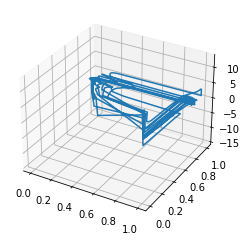

In [3]:
airfoil_idx = random.randint(0, len(label_encoder.classes_))
data = df.loc[df['Airfoil_Type_Encoded'] == airfoil_idx]

print(f"Plots for airfoil {data.iloc[0]['Airfoil_Type']}")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = 'Bot_Xtr'
y = 'Top_Xtr'
z = 'Alpha'
ax.plot3D(data[x], data[y], data[z])

plt.show()

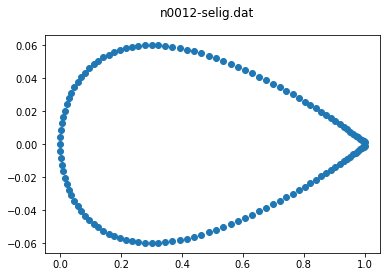

In [2]:
dat_filename = 'n0012-selig.dat'
with open(dat_filename, 'r') as file:
    # Parse the lengths separately
    dat_header = file.readline()
    lengths = file.readline().replace(' ', '').split('.')
    top_length = int(lengths[0])
    bot_length = int(lengths[1])

    #print(f"Dat Header: ", dat_header)
    #print(f"Top/Bot = {top_length}/{bot_length}")

    # Read all the coordinates together
    arr = np.loadtxt(dat_filename, skiprows=1)
    #top_arr = arr[0:top_length]
    #bot_arr = arr[top_length:]

    #print(f"Arr Shape={arr.shape}")
    #print(f"Shape Top/Bot = {top_arr.shape}/{bot_arr.shape}")

    # Rearrange to the proper XFoil format
    #arr2 = np.vstack((top_arr[::-1], bot_arr))

    # Create the airfoil
    test_foil = Airfoil(x=arr[:, :-1], y=arr[:, -1])

    # Visualize
    #plt.figure()
    #plt.suptitle("NACA0012 (example)")
    #plt.scatter(naca0012.x, naca0012.y)

    plt.figure()
    plt.suptitle(f'{dat_filename}')
    plt.scatter(test_foil.x, test_foil.y)

    #print(naca0012.x)
    #print(test_foil.x)

In [3]:
xf = XFoil()
xf.print = False
xf.airfoil = test_foil
xf.Re = 0.050e6
xf.n_crit = 9
xf.max_iter = 70
xf.M = 0
xf.xtr = (1.0, 1.0)

%time a, cl, cd, cm, cp, conv, xstrip1, xstrip2, xoctr1, xoctr2, yoctr1, yoctr2 = xf.aseq(-10, 10, 0.25)

data = pd.DataFrame()
data['Alpha'] = a
data['Cl'] = cl
data['Cd'] = cd
data['CDp'] = cp
data['Cm'] = cm
data['XStrip(1)'] = xstrip1
data['XStrip(2)'] = xstrip2
data['XOCtr(1)'] = xoctr1
data['XOCtr(2)'] = xoctr2
data['YOCtr(1)'] = yoctr1
data['YOCtr(2)'] = yoctr2
data.to_csv(f'{dat_filename}-polar.csv', index=False)

CPU times: user 1.34 s, sys: 0 ns, total: 1.34 s
Wall time: 1.34 s


In [10]:
data.head()

,Alpha,Cl,Cd,CDp,Cm,XStrip(1),XStrip(2),XOCtr(1),XOCtr(2),YOCtr(1),YOCtr(2)
0,-10.00,-0.748904,0.081327,-2.595186,-0.019245,1.0,1.0,1.0,0.162529,0.00126,-0.054647
1,-9.75,-0.797019,0.072756,-2.815675,-0.022017,1.0,1.0,1.0,0.155450,0.00126,-0.053991
2,-9.50,-0.822543,0.066833,-2.916191,-0.021944,1.0,1.0,1.0,0.154025,0.00126,-0.053853
3,-9.25,-0.842397,0.061485,-2.993247,-0.020969,1.0,1.0,1.0,0.153975,0.00126,-0.053848
4,-9.00,-0.854534,0.056717,-3.040653,-0.019405,1.0,1.0,1.0,0.155297,0.00126,-0.053977


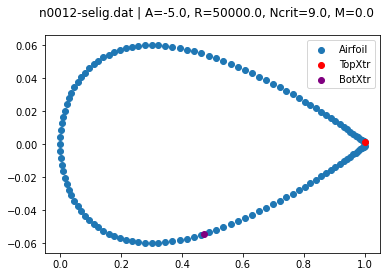

In [26]:
alpha_visualize = -5.0

plt.figure()
plt.suptitle(f'{dat_filename} | A={alpha_visualize}, R={xf.Re}, Ncrit={xf.n_crit}, M={xf.M}')
plt.scatter(test_foil.x, test_foil.y, label='Airfoil')

row = data[data['Alpha']==alpha_visualize]

top_xtr = (row['XOCtr(1)'], row['YOCtr(1)'])
bot_xtr = (row['XOCtr(2)'], row['YOCtr(2)'])
plt.scatter(top_xtr[0], top_xtr[1], color='red', label='TopXtr')
plt.scatter(bot_xtr[0], bot_xtr[1], color='purple', label='BotXtr')
plt.legend()
